In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
!pip install fastdtw

In [68]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [69]:
kospi = pd.read_csv("/content/drive/MyDrive/캡스톤디자인/KOSPI2022.csv")
kospi

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,2998.320068,3010.770020,2591.530029,2663.340088,2663.340088,10916900
1,2022-02-01,2706.340088,2788.270020,2642.629883,2699.179932,2699.179932,10111500
2,2022-03-01,2698.310059,2765.199951,2605.810059,2757.649902,2757.649902,14388900
3,2022-04-01,2745.850098,2769.179932,2615.500000,2695.050049,2695.050049,22014500
4,2022-05-01,2669.209961,2702.100098,2546.800049,2685.899902,2685.899902,16851600
5,2022-06-01,2670.739990,2681.510010,2306.479980,2332.639893,2332.639893,12006600
6,2022-07-01,2342.919922,2463.050049,2276.629883,2451.500000,2451.500000,7950200
7,2022-08-01,2444.050049,2546.350098,2417.010010,2472.050049,2472.050049,9760600
8,2022-09-01,2443.000000,2453.949951,2134.770020,2155.489990,2155.489990,9370100
9,2022-10-01,2189.510010,2295.510010,2162.870117,2293.610107,2293.610107,11769900


In [70]:
# KOSPI를 DATE, CLOSE로 전처리

kospi = kospi[['Date', 'Close']]
kospi

,Date,Close
0,2022-01-01,2663.340088
1,2022-02-01,2699.179932
2,2022-03-01,2757.649902
3,2022-04-01,2695.050049
4,2022-05-01,2685.899902
5,2022-06-01,2332.639893
6,2022-07-01,2451.500000
7,2022-08-01,2472.050049
8,2022-09-01,2155.489990
9,2022-10-01,2293.610107


In [71]:
# GDP데이터

gdp_2022 = pd.DataFrame({
    'Date' : ['2022-1/4', '2022-2/4', '2022-3/4', '2022-4/4'],
    'GDP' : [512012.9, 544239.8, 548892.5, 556628.7]
})
gdp_2022

,Date,GDP
0,2022-1/4,512012.9
1,2022-2/4,544239.8
2,2022-3/4,548892.5
3,2022-4/4,556628.7


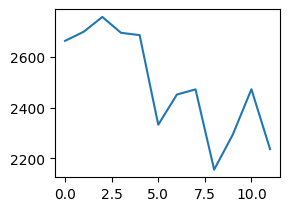

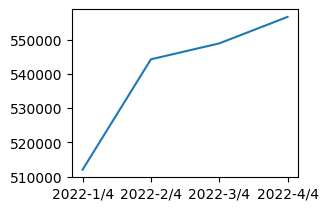

In [72]:
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
plt.plot(kospi['Date'].index, kospi['Close'])
plt.show()

plt.subplot(2,2,2)
plt.plot(gdp_2022['Date'], gdp_2022['GDP'])
plt.show()

In [73]:
# To numpy array

kospi_toArr = np.array(kospi['Close']).reshape(-1, 1)
gdp_toArr = np.array(gdp_2022['GDP']).reshape(-1, 1)

# GDP normalization -> min-max scale

kospi_x_max = np.max(kospi_toArr)
kospi_x_min = np.min(kospi_toArr)

gdp_x_max = np.max(gdp_toArr)
gdp_x_min = np.min(gdp_toArr)

for i in range(len(kospi_toArr)) :
  kospi_toArr[i] = (kospi_toArr[i] - kospi_x_min) / (kospi_x_max - kospi_x_min)

for i in range (len(gdp_toArr)) :
  gdp_toArr[i] = (gdp_toArr[i] - gdp_x_min) / (gdp_x_max - gdp_x_min)

print('-----------Normalization KOSPI-----------')
print(kospi_toArr)
print('\n')
print('-----------Normalization GDP-----------')
print(gdp_toArr)

-----------Normalization KOSPI-----------
[[0.84338078]
 [0.9028996 ]
 [1.        ]
 [0.89604115]
 [0.88084561]
 [0.29419079]
 [0.4915804 ]
 [0.52570763]
 [0.        ]
 [0.22937448]
 [0.52650473]
 [0.13436615]]


-----------Normalization GDP-----------
[[0.        ]
 [0.72232034]
 [0.82660403]
 [1.        ]]


In [74]:
# DTW 계산

distance, path = fastdtw(kospi_toArr, gdp_toArr, dist = euclidean)

print("DTW Distance between the two time series: {}".format(distance))
print("DTW Path: {}".format(path))


DTW Distance between the two time series: 4.870367322938655
DTW Path: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 3)]
